In [35]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

sns.set()
%matplotlib inline

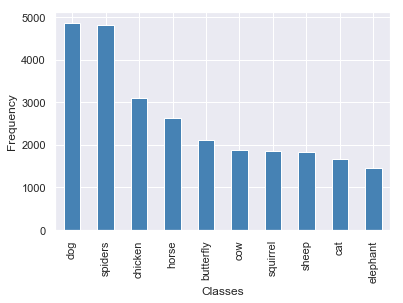

In [29]:
def class_freq(dir_pref, color):

    classes = os.listdir(dir_pref)
    counts = [len(os.listdir(os.path.join(dir_pref,x))) for x in classes]

    pd.Series(index = classes, data = counts).sort_values(ascending = False).plot(kind = "bar", color = color)
    plt.xlabel("Classes")
    plt.ylabel("Frequency")

class_freq("animals10/raw-img", "steelblue")


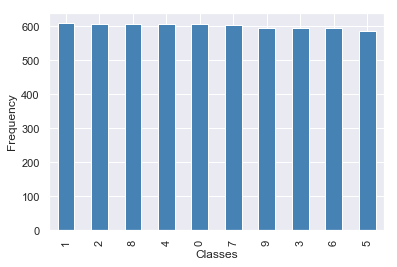

In [30]:
class_freq("train", "steelblue")

There is some class imbalance here so we should try an balance that to be ~2000.

cane
cavallo
elefante
farfalla
gallina
gatto
mucca
pecora
ragno
scoiattolo


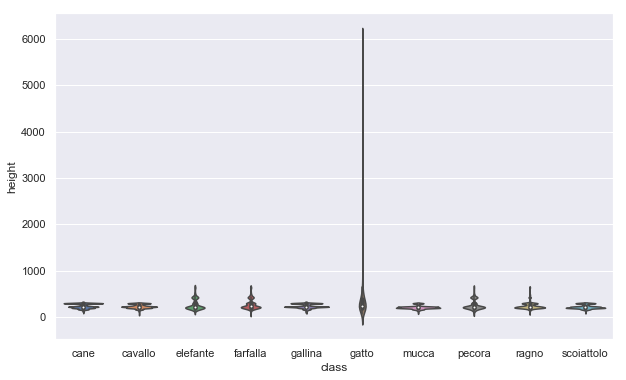

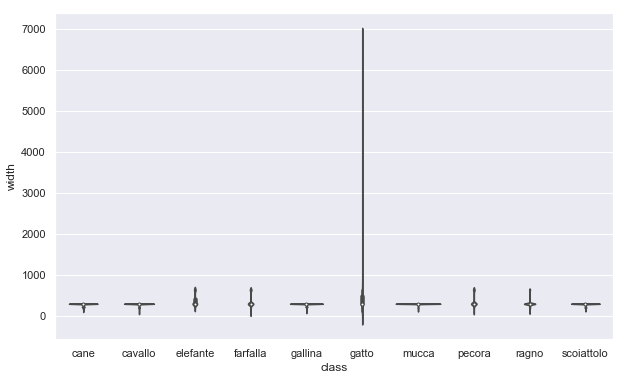

In [21]:
def get_file_dim_distributions(directory, classes):
    height = []
    width = []
    for c in classes:
        print(c)
        for img in os.listdir(os.path.join(dir_pref, c)):
            image = cv2.imread(os.path.join(dir_pref, c, img))
            image_dim = image.shape
            height.append([c, image_dim[0]])
            width.append([c, image_dim[1]])
            del image
    
    height_df = pd.DataFrame(height, columns = ["class", "height"])
    width_df = pd.DataFrame(width, columns = ["class", "width"])
    
    plt.figure(figsize = (10, 6))
    sns.violinplot(data = height_df, x = "class", y = "height")
    
    plt.figure(figsize = (10, 6))
    sns.violinplot(data = width_df, x = "class", y = "width")
    
    
    
            
            
get_file_dim_distributions(dir_pref, classes)
    

In [24]:
transfer_learn_res = pd.read_csv("VGG_log.csv")
transfer_learn_res.columns

Index(['Unnamed: 0', 'train_loss', 'valid_loss', 'train_acc', 'valid_acc'], dtype='object')

Text(0,0.5,'Top-1 Accuracy')

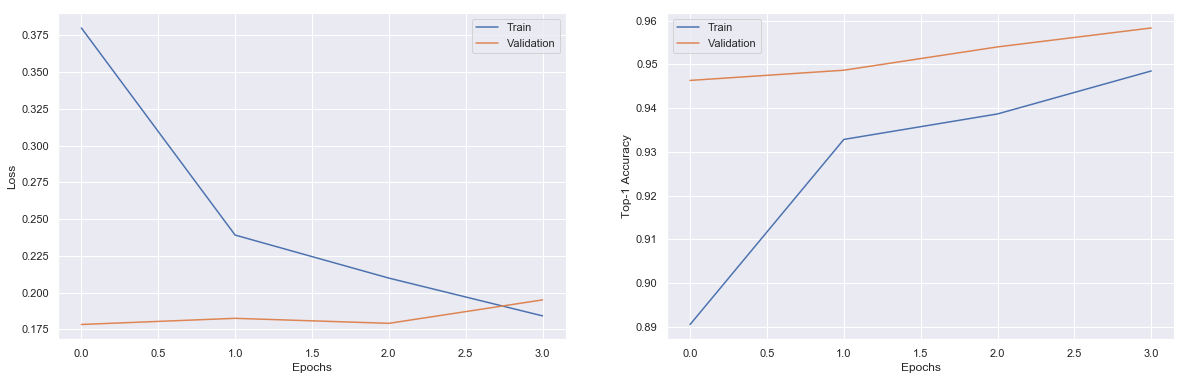

In [25]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
sns.lineplot(data = transfer_learn_res, x = "Unnamed: 0", y = "train_loss", label = "Train")
sns.lineplot(data = transfer_learn_res, x = "Unnamed: 0", y = "valid_loss", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(122)
sns.lineplot(data = transfer_learn_res, x = "Unnamed: 0", y = "train_acc", label = "Train")
sns.lineplot(data = transfer_learn_res, x = "Unnamed: 0", y = "valid_acc", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Top-1 Accuracy")

In [33]:
def clusterReport(data,max_clusters,clusterAlgo,legendLabel):
    '''
    INPUT: 
    data - a ndarray/dataframe of data
    max_clusters - int, the maximum number of clusters for the report
    clusterAlgo - The clustering algorithm
    
    OUTPUT:
    visualizations - A set of visualizations based on clustering metrics I have not defined yet.
    '''
    
    # metrics: sc
    scores = []
    
    for i in range(2,max_clusters+1):
        model = clusterAlgo(n_clusters=i)
        labels = model.fit_predict(data)
        scores.append(silhouette_score(X=data,labels=labels))
    sns.lineplot(x=list(range(2,max_clusters+1)),y=scores,label=legendLabel)

def createReports(dir_,max_clusters,algos):
    '''
    Creates the reports based on the datasets and the algorithms.
    '''
    for file in os.listdir(dir_):
        plt.figure()
        for algo in algos:
            print(file,str(algo).split('.')[-1][:-2])
            clusterReport(pd.read_csv(dir_+file).drop('filename',axis=1),max_clusters,algo,str(algo).split('.')[-1][:-2])
        plt.title(file.split('_')[1])
        plt.legend()

def getClusterDistribution(data,k):
    '''
    Using K-Means, returns the cluster distribution for the dataset. We will use this to understand the cluster
    distributions, which will allow us to get a better understanding of what the clusters will look like.
    We also will surface the clusters in 2D as well for initial exploratory analysis.
    '''
    
    # get cluster labels
    kmeans = KMeans(n_clusters=k)
    results = kmeans.fit_predict(data)
    
    # create bar chart
    labels, frequency = np.unique(results,return_counts=True)
    sns.barplot(x=labels,y=frequency)
    
    # create cluster viz
    # TODO

test_layer18_output.csv KMeans
test_layer18_output.csv AgglomerativeClustering
test_layer27_output.csv KMeans
test_layer27_output.csv AgglomerativeClustering
test_layer36_output.csv KMeans
test_layer36_output.csv AgglomerativeClustering
test_layer4_output.csv KMeans
test_layer4_output.csv AgglomerativeClustering
test_layer9_output.csv KMeans
test_layer9_output.csv AgglomerativeClustering


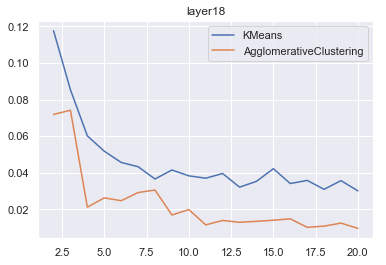

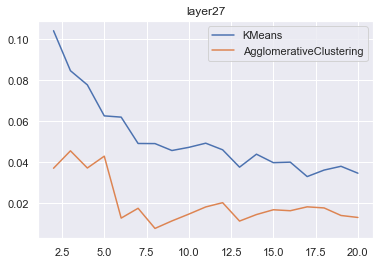

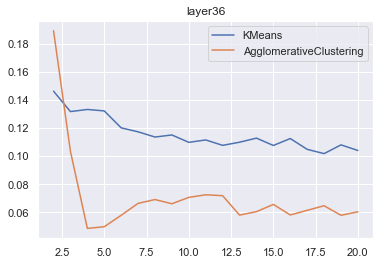

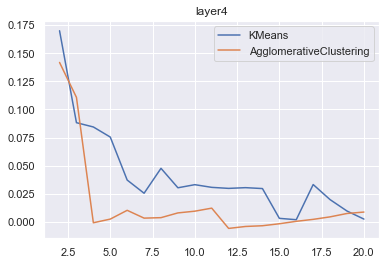

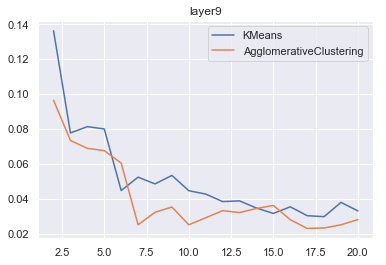

In [37]:
createReports('intermediate_layer_outputs/',20,[KMeans,AgglomerativeClustering])